In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

## Лабораторная 1.1

Чтение данных из файла

In [7]:
student_scores = pd.read_csv('data/student_scores.csv', sep=',')
student_scores.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


Статистическая информация о используемых данных (количество, min, max, среднее) по каждому из столбцов

In [8]:
student_scores.describe().loc[['count', 'min', 'max', 'mean']]

,Hours,Scores
count,25.000,25.00
min,1.100,17.00
max,9.200,95.00
mean,5.012,51.48


Вычисление параметров регрессионной прямой методом наименьших квадратов

   Регрессия имеет вид
   
   $ f(x) = \omega_0 + \omega_1 x $

   Задача: найти такие $ \omega_0 $ и $ \omega_1 $, что функция MSE

   $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - f(x_i))^2 $ или $ MSE = \frac{1}{n} \sum_{i=0}^{n} (y_i - \omega_0 - \omega_1 x)^2 $
   
   (среднеквадратическая ошибка) будет принимать наименьшее значение.

   Находя минимумы по  $ \omega_0 $ и $ \omega_1 $ и решая полученную систему получим точное решение:
   $$ \omega_1 = \frac{\frac{\sum_{i=0}^{n} x_i \sum_{i=0}^{n} y_i}{n} - \sum_{i=0}^{n}(y_i * x_i)}{\frac{(\sum_{i=0}^{n} x_i)^2}{n} - \sum_{i=0}^{n} x_i^2} $$
   $$ \omega_0 = \frac{1}{n}(\sum_{i=0}^{n} y_i - \omega_1 * \sum_{i=0}^{n} x_i) $$

In [9]:
hours_score_mode = int(input('Выбрать в качестве (X и Y) (Hours и Scores) соотвественно: впишите 1. Иначе: 0\n'))
if hours_score_mode == 1:
    x = student_scores.Hours
    y = student_scores.Scores
else:
    x = student_scores.Scores
    y = student_scores.Hours
n = x.size

Выбрать в качестве (X и Y) (Hours и Scores) соотвественно: впишите 1. Иначе: 0
 1


Параметры регрессионной прямой:

In [10]:
w1 = (x.sum() * y.sum() / n - np.dot(x, y))/(((x.sum())**2)/n - (x**2).sum())
w0 = 1/n * (y.sum() - w1 * x.sum())
print(f'y = {w0} + {w1}x')

y = 2.483673405373247 + 9.77580339078746x


In [11]:
def get_y_regr(x):
    return w0 + w1*x
y_regr = get_y_regr(x)

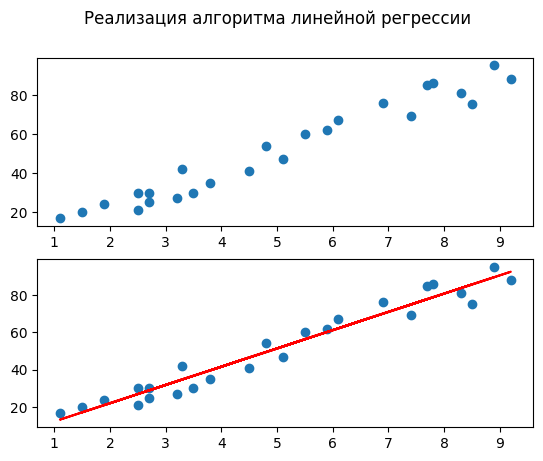

In [12]:
fig, (ax1, ax2) = plt.subplots(2)
fig.suptitle('Реализация алгоритма линейной регрессии')
ax1.scatter(x, y)

ax2.scatter(x, y)
ax2.plot(x, y_regr, 'r')

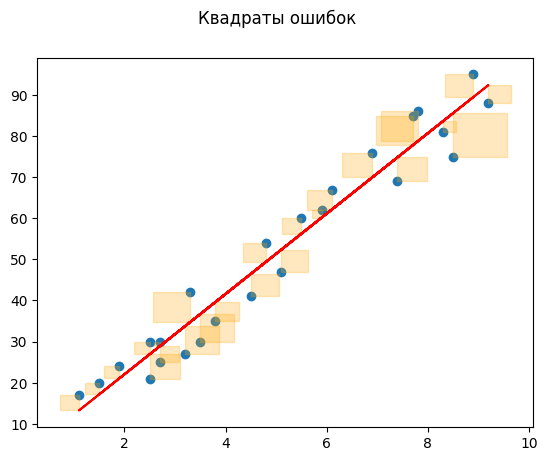

In [13]:
fig, (ax3) = plt.subplots(1)

fig.suptitle('Квадраты ошибок')

ax3.scatter(x, y)
ax3.plot(x, y_regr, 'r')

transform_width = 1/10 if hours_score_mode == 1 else 10

for i in range(n):
    width = (get_y_regr(x[i]) - y[i]) * transform_width
    height = get_y_regr(x[i]) - y[i]
    square = patches.Rectangle((x[i], y[i]), width, height, edgecolor='orange', facecolor='orange', alpha=0.25)
    ax3.add_patch(square)

## Лабораторная работа 1.2

In [79]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import seaborn as sns

from sklearn.metrics import mean_squared_error

In [80]:
diabetes_bunch = datasets.load_diabetes()
diabetes = pd.DataFrame(diabetes_bunch.data, columns=diabetes_bunch.feature_names)
diabetes['target'] = pd.Series(diabetes_bunch.target)
diabetes.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


Визуализируем зависимости между данными

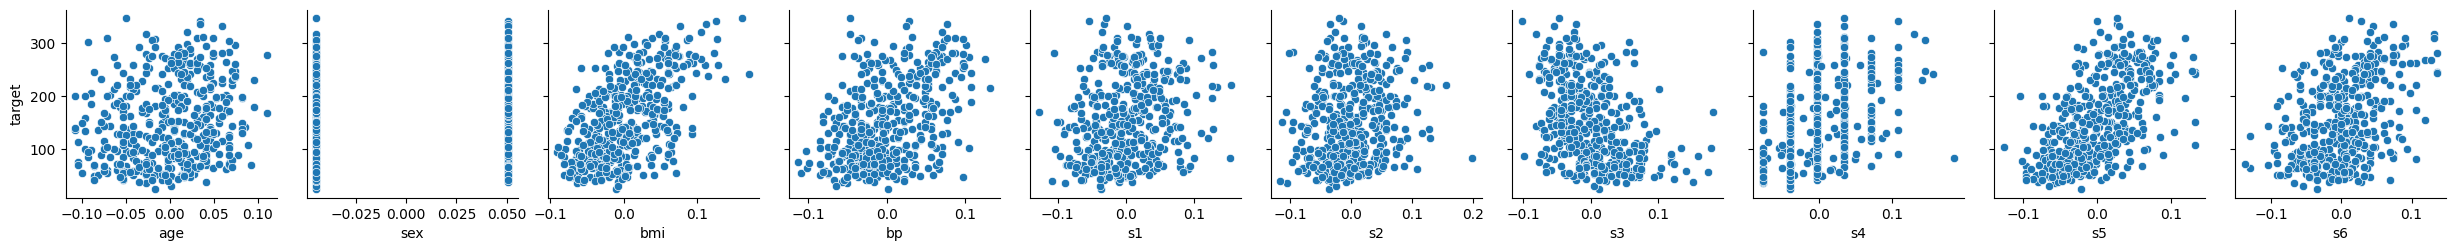

In [81]:
sns.pairplot(diabetes, x_vars=diabetes.columns[:-1], y_vars=diabetes.columns[-1])

Видим, что большинство признаков приближенно линейно зависят от целевого результата.

Попробуем обучить модель, используя все признаки.

Разделим данные на обучающую и тестовую выборки с размером теста 33%

In [82]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(diabetes.drop('target', axis=1), diabetes['target'], test_size=0.33, random_state=0)

Создадим и обучим модель

In [83]:
model1 = LinearRegression()
model1.fit(X_train1, y_train1)

LinearRegression()

Посмотрим параметры нашей регрессии

In [84]:
print(model1.intercept_)
print(model1.coef_)

152.30459336500405
[ -40.64242486 -188.46864832  588.08137323  283.3412054  -689.5316629
  388.78945923   20.03052281   77.05422642  797.4576653    34.08248924]


Сделаем предсказание

In [85]:
y_pred1 = model1.predict(X_test1)

Выведем таблицу с результатами предсказаний:

In [86]:
ddd1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
ddd1

,Actual,Predicted
362,321.0,241.494975
249,215.0,248.733435
271,127.0,164.649125
435,64.0,116.875282
400,175.0,183.373047
...,...,...
336,306.0,249.020740
378,245.0,168.483308
387,201.0,91.466277
430,183.0,109.502265


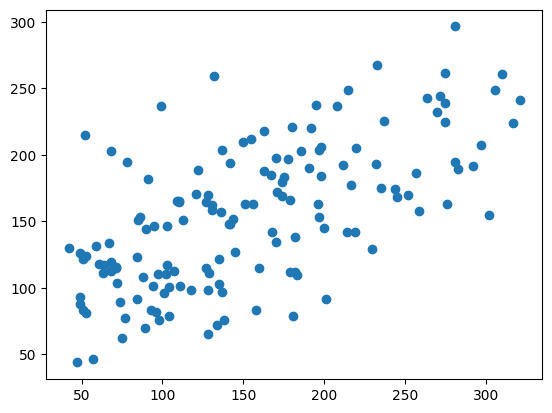

In [87]:
plt.scatter(x=ddd1['Actual'], y=ddd1['Predicted'])

MSE в таком случае:

In [88]:
mean_squared_error(y_test1, y_pred1)

3143.5360707633354

Видно, что предсказанные и изначальные данные не ярко выраженно, но корреллируют.

Попробуем теперь обучиться на каком-то одном признаке, от которого сильнее всего зависит ```target```. Это ```s5```

In [89]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(pd.DataFrame(diabetes['s5']), diabetes['target'], test_size=0.33, random_state=0)
model2 = LinearRegression()
model2.fit(X_train2, y_train2)
print(model2.intercept_)
print(model2.coef_)

151.9857553345942
[974.82537398]


In [90]:
y_pred2 = model2.predict(X_test2)
ddd2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
ddd2

,Actual,Predicted
362,321.0,155.601441
249,215.0,220.425692
271,127.0,134.328068
435,64.0,114.494247
400,175.0,118.333051
...,...,...
336,306.0,230.893542
378,245.0,174.102345
387,201.0,50.247594
430,183.0,142.316691


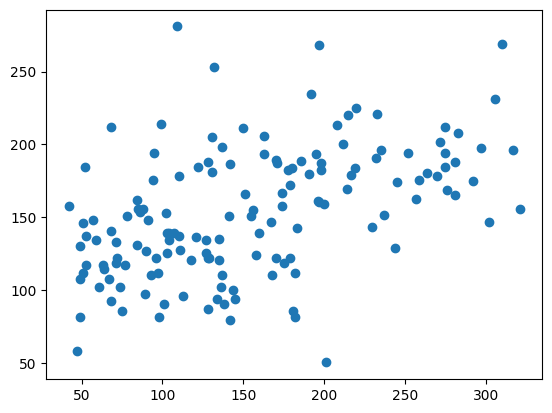

In [91]:
plt.scatter(x=ddd2['Actual'], y=ddd2['Predicted'])

MSE в случае с одним признаком:

In [92]:
mean_squared_error(y_test2, y_pred2)

4135.918691519317

Легко заметить, что средняя квадратическая ошибка в случае с одним признаком больше, чем в первом.
Отрисуем данные и регрессионную прямую

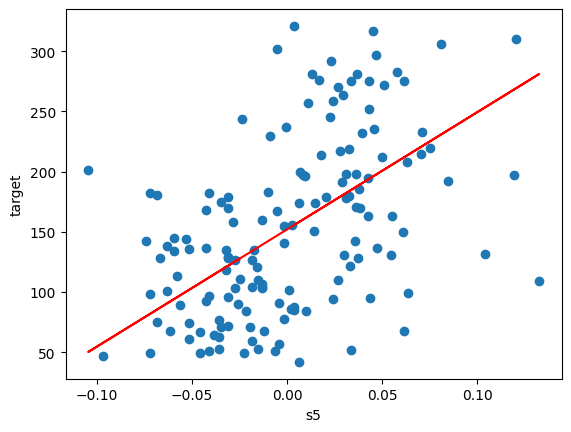

In [93]:
plt.scatter(X_test2, y_test2)
plt.xlabel('s5')
plt.ylabel('target')
plt.plot(X_test2, y_pred2, 'r')

## Лабораторная работа 1.3
Исследуем качество моделей со всеми признаками и с одним признаком, используя метрики ```MAE``` (mean absolute error), ```MAPE``` (mean absolute percentage error), ```R2``` (коэффициент детерминации).

In [94]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
print('MODEL 1')
print('MAE: ', mean_absolute_error(y_test1, y_pred1))
print('MAPE: ', mean_absolute_percentage_error(y_test1, y_pred1))
print('R2: ', r2_score(y_test1, y_pred1), '\n')

print('MODEL 2')
print('MAE: ', mean_absolute_error(y_test2, y_pred2))
print('MAPE: ', mean_absolute_percentage_error(y_test2, y_pred2))
print('R2: ', r2_score(y_test2, y_pred2))

MODEL 1
MAE:  44.9496371804543
MAPE:  0.3826436034363764
R2:  0.40330774395297964 

MODEL 2
MAE:  51.86735290501331
MAPE:  0.44459400849202857
R2:  0.21493801906003396


Можно сделать вывод, что качество модели, использующей все признаки, получилось заметно лучше, 
чем модели, использующий один наиболее корреллирующий признак с целевой меткой.